# Importando Bibliotecas

In [0]:
dbutils.fs.rm(r'/FileStore/tables/projeto_credito/Dados_de_treino1.csv',True)

Out[154]: True

In [0]:
#!pip install imblearn
#!pip install lightgbm

# Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import lightgbm as lgb

# DataFrame Config.
pd.options.display.max_rows = 150 # Mostrar no maximo 150 linhas de um objeto pandas
pd.options.display.max_columns = 150# Mostrar no maximo 150 colunas de um objeto pandas

In [0]:
# Funções
def clean_dataset(df):
    '''Função para limpar o dataset.'''
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame" 
    df.dropna(inplace=True) 
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1) 
    return df[indices_to_keep].astype(np.float64)

# Criando Data Lake

In [0]:
%sql
-- Criando o Data Lake
drop database if exists credito_dl cascade;
create database credito_dl;
use credito_dl;

##### Criando as tabelas no Data Lake

In [0]:
%python
# Arquivos do DBFS
arquivos = dbutils.fs.ls("/FileStore/tables/projeto_credito/")
arquivos

# Criando as tabelas com spark

for arquivo in arquivos:
    
    # Local e tipo do arquivo
    file_location = arquivo[0]
    file_type = "csv"
 
    # CSV
    infer_schema = "true"
    first_row_is_header = "true"
    delimiter = ","
 
    # Aplicando alterações para arquivos CSV
    df = spark.read.format(file_type) \
      .option("inferSchema", infer_schema) \
      .option("header", first_row_is_header) \
      .option("sep", delimiter) \
      .load(file_location)
 
    permanent_table_name =  arquivo[1][:-4]
    df.write.format("parquet").saveAsTable(permanent_table_name)
 
display(df)

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY CNT_CHILDREN AMT_INCOME_TOTAL AMT_CREDIT AMT_ANNUITY AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS NAME_HOUSING_TYPE REGION_POPULATION_RELATIVE DAYS_BIRTH DAYS_EMPLOYED DAYS_REGISTRATION DAYS_ID_PUBLISH OWN_CAR_AGE FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3 APARTMENTS_AVG BASEMENTAREA_AVG YEARS_BEGINEXPLUATATION_AVG YEARS_BUILD_AVG COMMONAREA_AVG ELEVATORS_AVG ENTRANCES_AVG FLOORSMAX_AVG FLOORSMIN_AVG LANDAREA_AVG LIVINGAPARTMENTS_AVG LIVINGAREA_AVG NONLIVINGAPARTMENTS_AVG NONLIVINGAREA_AVG APARTMENTS_MODE BASEMENTAREA_MODE YEARS_BEGINEXPLUATATION_MODE YEARS_BUILD_MODE COMMONAREA_MODE ELEVATORS_MODE ENTRANCES_MODE FLOORSMAX_MODE FLOORSMIN_MODE LANDAREA_MODE LIVINGAPARTMENTS_MODE LIVINGAREA_MODE NONLIVINGAPARTMENTS_MODE NONLIVINGAREA_MODE APARTMENTS_MEDI BASEMENTAREA_MEDI YEARS_BEGINEXPLUATATION_MEDI YEARS_BUILD_MEDI COMMONAREA_MEDI ELEVATORS_MEDI ENTRANCES_MEDI FLOORSMAX_MEDI FLOORSMIN_MEDI LANDAREA_MEDI LIVINGAPARTMENTS_MEDI LIVINGAREA_MEDI NONLIVINGAPARTMENTS_MEDI NONLIVINGAREA_MEDI FONDKAPREMONT_MODE HOUSETYPE_MODE TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7 FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11 FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR 456162 0 Cash loans F N N 0 112500.0 700830.0 22738.5 585000.0 Unaccompanied Working Incomplete higher Single / not married House / apartment 0.019689 -8676 -813 -4163.0 -1363 null 1 1 1 1 0 0 Core staff 1.0 2 2 FRIDAY 17 0 0 0 1 1 0 Trade: type 2 null 0.6993732026698447 0.17146836689679945 0.0619 0.0302 0.9762 0.6736 0.0055 0.0 0.1034 0.1667 0.0417 0.0 0.0504 0.0507 0.0 0.0 0.063 0.0313 0.9762 0.6864 0.0055 0.0 0.1034 0.1667 0.0417 0.0 0.0551 0.0528 0.0 0.0 0.0625 0.0302 0.9762 0.6779999999999999 0.0055 0.0 0.1034 0.1667 0.0417 0.0 0.0513 0.0516 0.0 0.0 reg oper account block of flats 0.0399 Block No 0.0 0.0 0.0 0.0 -589.0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0 0.0 0.0 0.0 0.0 1.0 134978 0 Cash loans F N N 0 90000.0 375322.5 14422.5 324000.0 Unaccompanied Commercial associate Secondary / secondary special Married House / apartment 0.025164 -13583 -223 -3554.0 -3287 null 1 1 0 1 0 0 High skill tech staff 2.0 2 2 MONDAY 11 0 0 0 0 0 0 Business Entity Type 3 0.5413851188072307 0.19965138852486625 0.7688075728291359 0.0227 0.0566 0.9806 0.7348 0.0161 0.0 0.1034 0.0417 0.0833 0.0133 0.0185 0.0184 0.0 0.0 0.0231 0.0587 0.9806 0.7452 0.0162 0.0 0.1034 0.0417 0.0833 0.0136 0.0202 0.0192 0.0 0.0 0.0229 0.0566 0.9806 0.7383 0.0162 0.0 0.1034 0.0417 0.0833 0.0135 0.0188 0.0187 0.0 0.0 reg oper account block of flats 0.0158 Block No 0.0 0.0 0.0 0.0 -1409.0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0 0.0 0.0 1.0 0.0 3.0 318952 0 Cash loans M Y N 0 180000.0 544491.0 16047.0 454500.0 Unaccompanied Working Secondary / secondary special Married House / apartment 0.035792000000000004 -13993 -6202 -7971.0 -4175 9.0 1 1 1 1 0 0 Managers 2.0 2 2 THURSDAY 15 0 0 0 0 0 0 Business Entity Type 1 null 0.7048795707579417 0.6263042766749393 null null null null null null null null null null 

In [0]:
%sql
-- Selecionando uma tabela do data lake

SELECT * FROM application_test_student

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY CNT_CHILDREN AMT_INCOME_TOTAL AMT_CREDIT AMT_ANNUITY AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS NAME_HOUSING_TYPE REGION_POPULATION_RELATIVE DAYS_BIRTH DAYS_EMPLOYED DAYS_REGISTRATION DAYS_ID_PUBLISH OWN_CAR_AGE FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3 APARTMENTS_AVG BASEMENTAREA_AVG YEARS_BEGINEXPLUATATION_AVG YEARS_BUILD_AVG COMMONAREA_AVG ELEVATORS_AVG ENTRANCES_AVG FLOORSMAX_AVG FLOORSMIN_AVG LANDAREA_AVG LIVINGAPARTMENTS_AVG LIVINGAREA_AVG NONLIVINGAPARTMENTS_AVG NONLIVINGAREA_AVG APARTMENTS_MODE BASEMENTAREA_MODE YEARS_BEGINEXPLUATATION_MODE YEARS_BUILD_MODE COMMONAREA_MODE ELEVATORS_MODE ENTRANCES_MODE FLOORSMAX_MODE FLOORSMIN_MODE LANDAREA_MODE LIVINGAPARTMENTS_MODE LIVINGAREA_MODE NONLIVINGAPARTMENTS_MODE NONLIVINGAREA_MODE APARTMENTS_MEDI BASEMENTAREA_MEDI YEARS_BEGINEXPLUATATION_MEDI YEARS_BUILD_MEDI COMMONAREA_MEDI ELEVATORS_MEDI ENTRANCES_MEDI FLOORSMAX_MEDI FLOORSMIN_MEDI LANDAREA_MEDI LIVINGAPARTMENTS_MEDI LIVINGAREA_MEDI NONLIVINGAPARTMENTS_MEDI NONLIVINGAREA_MEDI FONDKAPREMONT_MODE HOUSETYPE_MODE TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7 FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11 FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR 239831 Cash loans F N Y 0 144000.0 497520.0 33376.5 450000.0 Unaccompanied Commercial associate Secondary / secondary special Married House / apartment 0.006629 -12804 -462 -6932.0 -3519 null 1 1 1 1 1 0 Sales staff 2.0 2 2 THURSDAY 10 0 0 0 0 0 0 Self-employed null 0.16740785239378006 0.7862666146611379 0.0134 null 0.9727 null null 0.0 0.069 0.0417 null null null 0.0114 null null 0.0126 null 0.9727 null null 0.0 0.069 0.0417 null null null 0.0118 null null 0.0135 null 0.9727 null null 0.0 0.069 0.0417 null null null 0.0116 null null null block of flats 0.0089 Wooden Yes 0.0 0.0 0.0 0.0 0.0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0 0.0 0.0 1.0 0.0 2.0 136246 Cash loans M N N 0 315000.0 225000.0 23872.5 225000.0 Unaccompanied Working Higher education Separated House / apartment 0.030755 -10765 -1494 -4760.0 -3338 null 1 1 1 1 1 1 null 1.0 2 2 WEDNESDAY 16 0 0 0 0 0 0 Self-employed null 0.2858978721410488 0.7032033049040319 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 0.0 0.0 0.0 0.0 -603.0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0 0.0 0.0 0.0 2.0 1.0 283841 Cash loans F Y Y 2 90000.0 790434.0 61168.5 706500.0 Unaccompanied Commercial associate Higher education Married House / apartment 0.032561 -15418 -92 -4145.0 -2770 9.0 1 1 0 1 0 0 null 4.0 1 1 TUESDAY 17 0 0 0 0 0 0 Transport: type 4 null 0.7996512601692236 null 0.1223 0.0778 0.9767 0.6804 0.0371 0.1732 0.2297 0.2221 0.2638 0.0606 0.0992 0.1039 0.0025 0.0048 0.0735 0.0773 0.9767 0.6929 0.0 0.0 0.2414 0.1667 0.2083 0.0309 0.0634 0.0653 0.0039 0.0076 0.0729 0.0746 0.9767 0.6847 0.0 0.24 0.2414 0.1667 0.2083 0.0729 0.0599 0.0657 0.0039

# Criando o Staging Area

In [0]:
%sql

-- Criando o staging area
drop database if exists credito_stg cascade;
create database credito_stg;

# Criando Data Warehouse

In [0]:
%sql
-- Criando o Data Warehouse
drop database if exists credito_dw cascade;
create database credito_dw;
use credito_dw;

In [0]:
# Adicionando a tabela Homecredit ao staging
# Gerando o Df a partir dos aqruivos no DBFS
df = spark.table("credito_dl.homecredit_columns_description").select("*")

# Salvando a tabela na database_stg
df.write.format('parquet').saveAsTable("credito_stg.homecredit_columns_description")

Número de itens únicos por coluna
NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Distribuição por gênero
F      0.659821
M      0.340162
XNA    0.000016
Name: CODE_GENDER, dtype: float64



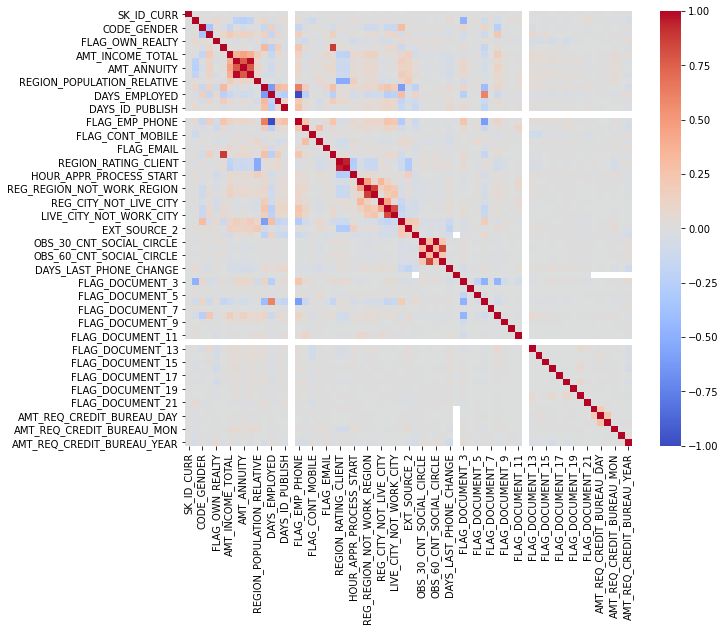

NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64
SK_ID_CURR                                           0.0
NAME_CONTRACT_TYPE                                   0.0
CODE_GENDER                                          0.0
FLAG_OWN_CAR                                         0.0
FLAG_OWN_REALTY                                      0.0
CNT_CHILDREN                                         0.0
AMT_INCOME_TOTAL                                     0.0
AMT_CREDIT                                           0.0
AMT_ANNUITY                                          0.0
AMT_GOODS_PRICE                                      0.0
REGION_POPULATION_RELATIVE                           0.0
DAYS_BIRTH                                           0.0
DAYS_EMPLOYED                          

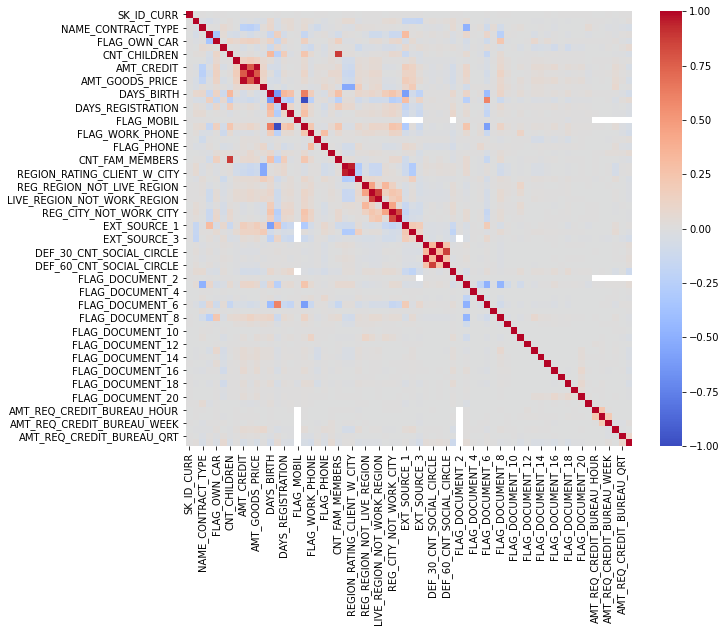

NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64
SK_ID_CURR                                           0.0
TARGET                                               0.0
NAME_CONTRACT_TYPE                                   0.0
CODE_GENDER                                          0.0
FLAG_OWN_CAR                                         0.0
FLAG_OWN_REALTY                                      0.0
CNT_CHILDREN                                         0.0
AMT_INCOME_TOTAL                                     0.0
AMT_CREDIT                                           0.0
AMT_ANNUITY                                          0.0
AMT_GOODS_PRICE                                      0.0
REGION_POPULATION_RELATIVE                           0.0
DAYS_BIRTH                             

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY CNT_CHILDREN AMT_INCOME_TOTAL AMT_CREDIT AMT_ANNUITY AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS NAME_HOUSING_TYPE REGION_POPULATION_RELATIVE DAYS_BIRTH DAYS_EMPLOYED DAYS_REGISTRATION DAYS_ID_PUBLISH OWN_CAR_AGE FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3 APARTMENTS_AVG BASEMENTAREA_AVG YEARS_BEGINEXPLUATATION_AVG YEARS_BUILD_AVG COMMONAREA_AVG ELEVATORS_AVG ENTRANCES_AVG FLOORSMAX_AVG FLOORSMIN_AVG LANDAREA_AVG LIVINGAPARTMENTS_AVG LIVINGAREA_AVG NONLIVINGAPARTMENTS_AVG NONLIVINGAREA_AVG APARTMENTS_MODE BASEMENTAREA_MODE YEARS_BEGINEXPLUATATION_MODE YEARS_BUILD_MODE COMMONAREA_MODE ELEVATORS_MODE ENTRANCES_MODE FLOORSMAX_MODE FLOORSMIN_MODE LANDAREA_MODE LIVINGAPARTMENTS_MODE LIVINGAREA_MODE NONLIVINGAPARTMENTS_MODE NONLIVINGAREA_MODE APARTMENTS_MEDI BASEMENTAREA_MEDI YEARS_BEGINEXPLUATATION_MEDI YEARS_BUILD_MEDI COMMONAREA_MEDI ELEVATORS_MEDI ENTRANCES_MEDI FLOORSMAX_MEDI FLOORSMIN_MEDI LANDAREA_MEDI LIVINGAPARTMENTS_MEDI LIVINGAREA_MEDI NONLIVINGAPARTMENTS_MEDI NONLIVINGAREA_MEDI FONDKAPREMONT_MODE HOUSETYPE_MODE TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7 FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11 FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR 239831 0 1 0 1 0 144000.0 497520.0 33376.5 450000.0 Unaccompanied Commercial associate Secondary / secondary special Married House / apartment 0.006629 -12804 -462 -6932.0 -3519 null 1 1 1 1 1 0 Sales staff 2.0 2 2 THURSDAY 10 0 0 0 0 0 0 Self-employed null 0.16740785239378006 0.7862666146611379 0.0134 null 0.9727 null null 0.0 0.069 0.0417 null null null 0.0114 null null 0.0126 null 0.9727 null null 0.0 0.069 0.0417 null null null 0.0118 null null 0.0135 null 0.9727 null null 0.0 0.069 0.0417 null null null 0.0116 null null null block of flats 0.0089 Wooden null 0.0 0.0 0.0 0.0 0.0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0 0.0 0.0 1.0 0.0 2.0 136246 0 0 0 0 0 315000.0 225000.0 23872.5 225000.0 Unaccompanied Working Higher education Separated House / apartment 0.030755 -10765 -1494 -4760.0 -3338 null 1 1 1 1 1 1 null 1.0 2 2 WEDNESDAY 16 0 0 0 0 0 0 Self-employed null 0.2858978721410488 0.7032033049040319 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 0.0 0.0 0.0 0.0 -603.0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0 0.0 0.0 0.0 2.0 1.0 283841 0 1 1 1 2 90000.0 790434.0 61168.5 706500.0 Unaccompanied Commercial associate Higher education Married House / apartment 0.032561 -15418 -92 -4145.0 -2770 9.0 1 1 0 1 0 0 null 4.0 1 1 TUESDAY 17 0 0 0 0 0 0 Transport: type 4 null 0.7996512601692236 null 0.1223 0.0778 0.9767 0.6804 0.0371 0.1732 0.2297 0.2221 0.2638 0.0606 0.0992 0.1039 0.0025 0.0048 0.0735 0.0773 0.9767 0.6929 0.0 0.0 0.2414 0.1667 0.2083 0.0309 0.0634 0.0653 0.0039 0.0076 0.0729 0.0746 0.9767 0.6847 0.0 0.24 0.2414 0.1667 0.2083 0.0729 0.0599 0.0657 0.0039 0.0073 not specified bloc

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY CNT_CHILDREN AMT_INCOME_TOTAL AMT_CREDIT AMT_ANNUITY AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS NAME_HOUSING_TYPE REGION_POPULATION_RELATIVE DAYS_BIRTH DAYS_EMPLOYED DAYS_REGISTRATION DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3 OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7 FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11 FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR 239831 0 1 0 1 0 144000.0 497520.0 33376.5 450000.0 Unaccompanied Commercial associate Secondary / secondary special Married House / apartment 0.006629 -12804 -462 -6932.0 -3519 1 1 1 1 1 0 Sales staff 2.0 2 2 THURSDAY 10 0 0 0 0 0 0 Self-employed null 0.16740785239378006 0.7862666146611379 0.0 0.0 0.0 0.0 0.0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0 0.0 0.0 1.0 0.0 2.0 136246 0 0 0 0 0 315000.0 225000.0 23872.5 225000.0 Unaccompanied Working Higher education Separated House / apartment 0.030755 -10765 -1494 -4760.0 -3338 1 1 1 1 1 1 null 1.0 2 2 WEDNESDAY 16 0 0 0 0 0 0 Self-employed null 0.2858978721410488 0.7032033049040319 0.0 0.0 0.0 0.0 -603.0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0 0.0 0.0 0.0 2.0 1.0 283841 0 1 1 1 2 90000.0 790434.0 61168.5 706500.0 Unaccompanied Commercial associate Higher education Married House / apartment 0.032561 -15418 -92 -4145.0 -2770 1 1 0 1 0 0 null 4.0 1 1 TUESDAY 17 0 0 0 0 0 0 Transport: type 4 null 0.7996512601692236 null 1.0 0.0 1.0 0.0 -479.0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 null null null null null null 357049 0 1 0 0 0 157500.0 675000.0 28728.0 675000.0 Unaccompanied Working Secondary / secondary special Married House / apartment 0.014519999999999996 -19827 -2790 -912.0 -3342 1 1 0 1 0 0 Sales staff 2.0 2 2 MONDAY 8 0 0 0 0 0 0 Trade: type 7 null 0.11416162234722878 0.6894791426446275 2.0 2.0 2.0 2.0 -2616.0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0 0.0 0.0 0.0 0.0 7.0 357721 0 1 1 1 2 382500.0 1190340.0 63549.0 1125000.0 Unaccompanied Working Secondary / secondary special Married House / apartment 0.019101 -14042 -2252 -4306.0 -617 1 1 0 1 0 0 Sales staff 4.0 2 2 WEDNESDAY 9 0 0 0 0 0 0 Self-employed null 0.6326933261198023 null 2.0 2.0 2.0 2.0 -2307.0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 null null null null null null

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY CNT_CHILDREN AMT_INCOME_TOTAL AMT_CREDIT AMT_ANNUITY AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS NAME_HOUSING_TYPE REGION_POPULATION_RELATIVE DAYS_BIRTH DAYS_EMPLOYED DAYS_REGISTRATION DAYS_ID_PUBLISH OWN_CAR_AGE FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3 APARTMENTS_AVG BASEMENTAREA_AVG YEARS_BEGINEXPLUATATION_AVG YEARS_BUILD_AVG COMMONAREA_AVG ELEVATORS_AVG ENTRANCES_AVG FLOORSMAX_AVG FLOORSMIN_AVG LANDAREA_AVG LIVINGAPARTMENTS_AVG LIVINGAREA_AVG NONLIVINGAPARTMENTS_AVG NONLIVINGAREA_AVG APARTMENTS_MODE BASEMENTAREA_MODE YEARS_BEGINEXPLUATATION_MODE YEARS_BUILD_MODE COMMONAREA_MODE ELEVATORS_MODE ENTRANCES_MODE FLOORSMAX_MODE FLOORSMIN_MODE LANDAREA_MODE LIVINGAPARTMENTS_MODE LIVINGAREA_MODE NONLIVINGAPARTMENTS_MODE NONLIVINGAREA_MODE APARTMENTS_MEDI BASEMENTAREA_MEDI YEARS_BEGINEXPLUATATION_MEDI YEARS_BUILD_MEDI COMMONAREA_MEDI ELEVATORS_MEDI ENTRANCES_MEDI FLOORSMAX_MEDI FLOORSMIN_MEDI LANDAREA_MEDI LIVINGAPARTMENTS_MEDI LIVINGAREA_MEDI NONLIVINGAPARTMENTS_MEDI NONLIVINGAREA_MEDI FONDKAPREMONT_MODE HOUSETYPE_MODE TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7 FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11 FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR 398620 0 0 1 1 1 0 67500.0 364896.0 17685.0 315000.0 Family Pensioner Secondary / secondary special Married House / apartment 0.019101 -22278 365243 -106.0 -4957 10.0 1 0 0 1 0 0 null 2.0 2 2 THURSDAY 11 0 0 0 0 0 0 XNA 0.602118849826765 0.665226074175194 null 0.3216 0.58 0.997 0.9592 0.1316 0.24 0.2069 0.375 0.0 0.0 0.2597 0.2701 0.0116 0.0156 0.3277 0.6019 0.997 0.9608 0.1328 0.2417 0.2069 0.375 0.0 0.0 0.2837 0.2814 0.0117 0.0165 0.3248 0.58 0.997 0.9597 0.1324 0.24 0.2069 0.375 0.0 0.0 0.2642 0.275 0.0116 0.0159 reg oper account block of flats 0.2844 Stone, brick null 5.0 0.0 5.0 0.0 -350.0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 null null null null null null 285513 0 0 0 1 1 0 67500.0 531706.5 29817.0 459000.0 Unaccompanied Pensioner Secondary / secondary special Married House / apartment 0.031329 -23578 365243 -1652.0 -4259 13.0 1 0 0 1 0 0 null 2.0 2 2 MONDAY 9 0 0 0 0 0 0 XNA null 0.6527501066974833 0.7136313997323308 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 0.0 0.0 0.0 0.0 -381.0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0 0.0 0.0 0.0 0.0 0.0 413814 0 0 1 0 0 0 112500.0 337500.0 17145.0 337500.0 Family Commercial associate Secondary / secondary special Single / not married House / apartment 0.00702 -17182 -968 -5426.0 -708 null 1 1 0 1 0 0 Sales staff 1.0 2 2 THURSDAY 17 0 0 0 0 1 1 Business Entity Type 3 null 0.3939130694298256 0.6075573001388961 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null n

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY CNT_CHILDREN AMT_INCOME_TOTAL AMT_CREDIT AMT_ANNUITY AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS NAME_HOUSING_TYPE REGION_POPULATION_RELATIVE DAYS_BIRTH DAYS_EMPLOYED DAYS_REGISTRATION DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3 OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7 FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11 FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR 398620 0 0 1 1 1 0 67500.0 364896.0 17685.0 315000.0 Family Pensioner Secondary / secondary special Married House / apartment 0.019101 -22278 365243 -106.0 -4957 1 0 0 1 0 0 null 2.0 2 2 THURSDAY 11 0 0 0 0 0 0 XNA 0.602118849826765 0.665226074175194 null 5.0 0.0 5.0 0.0 -350.0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 null null null null null null 285513 0 0 0 1 1 0 67500.0 531706.5 29817.0 459000.0 Unaccompanied Pensioner Secondary / secondary special Married House / apartment 0.031329 -23578 365243 -1652.0 -4259 1 0 0 1 0 0 null 2.0 2 2 MONDAY 9 0 0 0 0 0 0 XNA null 0.6527501066974833 0.7136313997323308 0.0 0.0 0.0 0.0 -381.0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0 0.0 0.0 0.0 0.0 0.0 413814 0 0 1 0 0 0 112500.0 337500.0 17145.0 337500.0 Family Commercial associate Secondary / secondary special Single / not married House / apartment 0.00702 -17182 -968 -5426.0 -708 1 1 0 1 0 0 Sales staff 1.0 2 2 THURSDAY 17 0 0 0 0 1 1 Business Entity Type 3 null 0.3939130694298256 0.6075573001388961 2.0 0.0 2.0 0.0 -451.0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0.0 0.0 0.0 0.0 3.0 17.0 406154 0 0 0 1 0 0 225000.0 675000.0 34290.0 675000.0 Unaccompanied Commercial associate Higher education Married Rented apartment 0.028663 -19548 -2912 -1329.0 -3087 1 1 0 1 0 0 Managers 2.0 2 2 WEDNESDAY 12 0 0 0 0 1 1 Construction null 0.5539839749407457 0.4311917977993083 0.0 0.0 0.0 0.0 -253.0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0 0.0 0.0 0.0 0.0 0.0 403995 0 0 1 0 1 0 112500.0 808650.0 23305.5 675000.0 Unaccompanied Pensioner Higher education Married House / apartment 0.02461 -22756 365243 -13349.0 -4005 1 0 0 1 0 0 null 2.0 2 2 FRIDAY 11 0 0 0 0 0 0 XNA null 0.6552193438843259 0.7862666146611379 0.0 0.0 0.0 0.0 -1432.0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0 0.0 0.0 0.0 2.0 4.0

In [0]:
# Tabelas de treino e teste
lista_tabelas = ["credito_dl.application_test_student", "credito_dl.application_train"]

lista_tabelas_stg = ["credito_stg.application_test_student", "credito_stg.application_train"]

lista_tabelas_dw = ["credito_dw.application_test_student", "credito_dw.application_train"]

for e, tabela in enumerate(lista_tabelas):
    # Carregando a tabela de dados de treino com o pyspark
    df = spark.table(tabela).select("*")

    # Transformando um RDD em objeto pandas.
    df_pd = df.toPandas()
    df_pd.head()
    
    # Vendo o número de valores unicos de cada coluna 'string'
    # Aparentemente tem 4 colunas que podem ser transformadas em binárias.
    print('Número de itens únicos por coluna')
    print(df_pd.select_dtypes('object').nunique())
    print()
    
    # Transformando as 4 colunas em binárias.
    df_pd['FLAG_OWN_CAR'] = df_pd['FLAG_OWN_CAR'].map({'N': 0, 'Y':1})
    df_pd['FLAG_OWN_REALTY'] = df_pd['FLAG_OWN_REALTY'].map({'N': 0, 'Y':1})
    df_pd['NAME_CONTRACT_TYPE'] = df_pd['NAME_CONTRACT_TYPE'].map({'Cash loans': 0, 'Revolving loans':1})
    df_pd['EMERGENCYSTATE_MODE'] = df_pd['NAME_CONTRACT_TYPE'].map({'No': 0, 'Yes':1})
    
    # Visualizando a porcentagem de cada gênero
    # O valor XNA tem apenas 1 registro, faz sentido excluir esse registro pela quantidade e transformar a coluna em binária.
    print('Distribuição por gênero')
    print(df_pd['CODE_GENDER'].value_counts(normalize= True))
    print()
    
    # Excluindo o registro do 'XNA' e transformando a coluna em binária
    df_pd = df_pd[df_pd['CODE_GENDER'] != 'XNA']
    df_pd['CODE_GENDER'] = df_pd['CODE_GENDER'].map({'M': 0, 'F':1})
    
    # Visualizando o data frame novo.
    display(df_pd.head())
    
    # Transformando o objento pandas em RDD para adicionar a tabela ao staging area
    df_spk = spark.createDataFrame(df_pd)
    
    # Salvando a tabela na database_stg
    df_spk.write.format('parquet').saveAsTable(lista_tabelas_stg[e])
    
    
    # Terceira Camada DW
    # Engenharia de feature
    
    # Vendo a proporção de valores faltantes de cada coluna
    df_pd.isna().sum()/(df_pd.shape[0])
    
    # Atribuindo o nome das colunas a uma variável
    nomes_colunas = df_pd.columns
    nomes_colunas = list(nomes_colunas)
    
    # Removendo a coluna EXT_SOURCE_1 dos nomes das colunas, pois nao queremos dropar ela caso tenha mais de 40% de NAs
    nomes_colunas.remove('EXT_SOURCE_1')
    
    # Dropando as colunas que tem mais de 40% de dados faltantes
    for coluna in nomes_colunas:
        if df_pd[coluna].isna().sum()/(df_pd.shape[0]) >= 0.4:
            df_pd.drop(columns = coluna, inplace = True)
    
    # Visão do novo DataFrame
    display(df_pd.head())
    
    # HeatMap de correlação
    plt.figure(figsize = (10,8))
    sns.heatmap(df_pd.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=False)
    plt.show()
    
    # Analisando a quantidade de valores unicos das colunas do tipo 'object' restantes
    print(df_pd.select_dtypes('object').nunique())
    
    # Excluindo as colunas que possuem varios valores unicos e não aparentam conter muita informação relevante para a modelagem.
    df_pd.drop(columns = 'OCCUPATION_TYPE', inplace = True)
    df_pd.drop(columns = 'NAME_TYPE_SUITE', inplace = True)
    df_pd.drop(columns = 'ORGANIZATION_TYPE', inplace = True)
    df_pd.drop(columns = 'NAME_INCOME_TYPE', inplace = True)
    df_pd.drop(columns = 'NAME_FAMILY_STATUS', inplace = True)
    df_pd.drop(columns = 'WEEKDAY_APPR_PROCESS_START', inplace = True)
    df_pd.drop(columns = 'NAME_HOUSING_TYPE', inplace = True)
    
    # Fazendo variáveis dummy com a coluna 'NAME_EDUCATION_TYPE' pois ela era a única que avaliamos conter informação importante.
    df_pd = pd.get_dummies(df_pd, 'NAME_EDUCATION_TYPE')
    
    # Dropando outra feature que avalimos nao conter informação importante
    df_pd.drop(columns = 'HOUR_APPR_PROCESS_START', inplace = True)
    
    # Analisando a porcentagem de valores faltantes de cada coluna.
    df_pd.isna().sum()/(df_pd.shape[0])
    
    # Dropando as linhas que tem NA nas colunas que possuem muito poucos NA.
    df_pd.dropna(subset = ['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE'], inplace = True)
    
    # Fazendo fillna com os valores 0 para essas colunas, pois a maioria esmagadora dos valores que existem nos dados é 0.
    values = {'AMT_REQ_CREDIT_BUREAU_HOUR':0,'AMT_REQ_CREDIT_BUREAU_DAY':0,'AMT_REQ_CREDIT_BUREAU_WEEK':0,'AMT_REQ_CREDIT_BUREAU_MON':0,'AMT_REQ_CREDIT_BUREAU_QRT':0,'AMT_REQ_CREDIT_BUREAU_YEAR':0}
    df_pd.fillna(value = values, inplace = True)
    
    # Fazendo fillna na source 3 com os valores da source 2, tendo como pretexto que as fontes não dariam notas muito diferentes. 
    df_pd.fillna(value = {'EXT_SOURCE_3':df_pd['EXT_SOURCE_2']}, inplace = True)
    
    # Fazendo fillna na source 1 com a media aritimética da source 2 e 3, tendo como pretexto que as fontes não dariam notas muito diferentes. 
    df_pd.fillna(value = {'EXT_SOURCE_1':(df_pd['EXT_SOURCE_2']+df_pd['EXT_SOURCE_3'])/2}, inplace = True)
    
    # Analisando a porcentagem de valores faltantes de cada coluna.
    print(df_pd.isna().sum()/(df_pd.shape[0]))
    
    # Fazendo um rename das colunas que possuem 'espaço', com o intuito de retirar os 'espaços' e gravar a tabela no data warehouse
    df_pd.rename(columns={"NAME_EDUCATION_TYPE_Academic degree": "NAME_EDUCATION_TYPE_Academic_degree", 'NAME_EDUCATION_TYPE_Higher education':'NAME_EDUCATION_TYPE_Higher_education',	'NAME_EDUCATION_TYPE_Incomplete higher':'NAME_EDUCATION_TYPE_Incomplete_higher',	'NAME_EDUCATION_TYPE_Lower secondary':'NAME_EDUCATION_TYPE_Lower_secondary',	'NAME_EDUCATION_TYPE_Secondary / secondary special':'NAME_EDUCATION_TYPE_Secondary/secondary_special'}, inplace = True)
    
    # Removendo colunas indesejadas
    df_pd.drop(["NAME_EDUCATION_TYPE_Academic_degree", 'NAME_EDUCATION_TYPE_Higher_education', 'NAME_EDUCATION_TYPE_Incomplete_higher',
           'NAME_EDUCATION_TYPE_Lower_secondary', 'NAME_EDUCATION_TYPE_Secondary/secondary_special'], axis = 1 ,inplace = True)
    
    # Novas features
    df_pd['NEW_CREDIT_TO_ANNUITY_RATIO']=df_pd['AMT_CREDIT']/df_pd['AMT_ANNUITY'] 
    df_pd['NEW_CREDIT_TO_GOODS_RATIO']=df_pd['AMT_CREDIT']/df_pd['AMT_GOODS_PRICE'] 
    df_pd['NEW_INC_PER_CHILD']=df_pd['AMT_INCOME_TOTAL']/(1+df_pd['CNT_CHILDREN']) 
    df_pd['NEW_EMPLOY_TO_BIRTH_RATIO']=df_pd['DAYS_EMPLOYED']/df_pd['DAYS_BIRTH'] 
    df_pd['NEW_ANNUITY_TO_INCOME_RATIO']=df_pd['AMT_ANNUITY']/(1+df_pd['AMT_INCOME_TOTAL']) 
    df_pd['NEW_SOURCES_PROD']=df_pd['EXT_SOURCE_1']*df_pd['EXT_SOURCE_2']*df_pd['EXT_SOURCE_3'] 
    df_pd['NEW_EXT_SCOURCES_MEAN']=df_pd[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1) 
    df_pd['NEW_SCORES_STD']=df_pd[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].std(axis=1) 
    df_pd['NEW_SCORES_STD']=df_pd['NEW_SCORES_STD'].fillna(df_pd['NEW_SCORES_STD'].mean())
    df_pd['NEW_PHONE_TO_BIRTH_RATIO']=df_pd['DAYS_LAST_PHONE_CHANGE']/df_pd['DAYS_BIRTH'] 
    df_pd['NEW_PHONE_TO_EMPLOY_RATIO']=df_pd['DAYS_LAST_PHONE_CHANGE']/df_pd['DAYS_EMPLOYED'] 
    df_pd['NEW_CREDIT_TO_INCOME_RATIO']=df_pd['AMT_CREDIT']/df_pd['AMT_INCOME_TOTAL']
    
    # Limpando o dataset
    df_pd = clean_dataset(df_pd)

    # Adicionando as tabelas finais ao DataWareHouse
    df_spk = spark.createDataFrame(df_pd)
    df_spk.write.format('parquet').saveAsTable(lista_tabelas_dw[e])

In [0]:
# Salvando o CSV no DBFS
# df_spk.coalesce(1).write.format("com.databricks.spark.csv").option("header", "true").option("delimiter", "\t").save("dbfs:/FileStore/tables/projeto_credito/Dados_de_treino.csv")

In [0]:
%sql
-- Selecionando a tabela que ta no datawarehouse
SELECT * from  application_train

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY CNT_CHILDREN AMT_INCOME_TOTAL AMT_CREDIT AMT_ANNUITY AMT_GOODS_PRICE REGION_POPULATION_RELATIVE DAYS_BIRTH DAYS_EMPLOYED DAYS_REGISTRATION DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3 OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7 FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11 FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR NEW_CREDIT_TO_ANNUITY_RATIO NEW_CREDIT_TO_GOODS_RATIO NEW_INC_PER_CHILD NEW_EMPLOY_TO_BIRTH_RATIO NEW_ANNUITY_TO_INCOME_RATIO NEW_SOURCES_PROD NEW_EXT_SCOURCES_MEAN NEW_SCORES_STD NEW_PHONE_TO_BIRTH_RATIO NEW_PHONE_TO_EMPLOY_RATIO NEW_CREDIT_TO_INCOME_RATIO 414901.0 1.0 0.0 0.0 1.0 1.0 1.0 270000.0 1255680.0 41629.5 1125000.0 0.010147 -15607.0 -5404.0 -9633.0 -3961.0 1.0 1.0 1.0 1.0 0.0 0.0 3.0 2.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.5298102697760758 0.5298102697760758 0.5298102697760758 0.0 0.0 0.0 0.0 -812.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 30.16322559723273 1.11616 135000.0 0.34625488562824375 0.15418276228606562 0.14871717156958628 0.5298102697760758 0.0 0.05202793618248222 0.15025906735751296 4.650666666666667 347447.0 0.0 0.0 1.0 1.0 1.0 1.0 103500.0 123637.5 9837.0 112500.0 0.015221 -9909.0 -2163.0 -4400.0 -1797.0 1.0 1.0 1.0 1.0 1.0 0.0 3.0 2.0 2.0 0.0 0.0 0.0 1.0 1.0 0.0 0.7152605046795868 0.7711154772908391 0.6594055320683344 1.0 0.0 1.0 0.0 -1628.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 12.568618481244282 1.099 51750.0 0.21828640629730547 0.09504255997526594 0.36369409613558673 0.7152605046795868 0.05585497261125233 0.1642950852760117 0.7526583448913546 1.1945652173913044 214460.0 0.0 0.0 1.0 1.0 0.0 0.0 117000.0 135000.0 5850.0 135000.0 0.019101 -19945.0 -8998.0 -11303.0 -2968.0 1.0 1.0 0.0 1.0 0.0 0.0 2.0 2.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.8328048773666559 0.6371133916690052 0.6446794549585961 6.0 0.0 6.0 0.0 -2428.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 23.076923076923077 1.0 117000.0 0.4511406367510654 0.04999957265322519 0.34206120695238074 0.7048659079980858 0.11086296153695549 0.1217347706192028 0.26983774172038233 1.1538461538461537 420977.0 0.0 0.0 1.0 0.0 1.0 0.0 166500.0 749349.0 24304.5 625500.0 0.072508 -17964.0 -853.0 -3260.0 -1519.0 1.0 1.0 0.0 1.0 1.0 0.0 2.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.7280231427882456 0.7097460725261203 0.746300213050371 2.0 0.0 2.0 0.0 -587.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 30.831697833734495 1.198 166500.0 0.047483856602093075 0.1459720962636861 0.3856219520168334 0.7280231427882456 0.018277070262125328 0.03267646403918949 0.6881594372801876 4.500594594594594 383534.0 0.0 1.0 1.0 0.0 1.0 0.0 171000.0 157500.0 7875.0 157500.0 0.001276 -11301.0 -603.0 -2088.0 -114.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 2.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.5578207872509938 0.5081686986646308 0.7047064232963289 1.0 0.0 1.0 0.0 -1021.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 20.0 1.0 171000.0 0.053358109901778604 0.046052

### Dividindo em teste e treino

In [0]:
# Entrada
X = df_pd[df_pd.columns[1:]].drop(columns = 'EXT_SOURCE_1')

# Saída
y = df_pd['TARGET']

# Dividindo o ambiente de treino e teste
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state = 101)

In [0]:
print(X_train.shape,X_validation.shape,y_train.shape,y_validation.shape)

(171089, 74) (73325, 74) (171089,) (73325,)


### Feature Selection

In [0]:
# Criando e treinando o selecionador de features
selector = SelectKBest(f_classif, k=30)
selector.fit(X_train, y_train)

# Seleciona as features e cria um novo DataFrame com as features escolhidas
cols = selector.get_support(indices=True)
features_df_new = X_train.iloc[:,cols]
features_df_new

/databricks/python/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 0 15] are constant.
  # flatten matrix to vector in sparse case
/databricks/python/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  prob = special.fdtrc(dfbn, dfwn, f)
/databricks/python/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  prob = special.fdtrc(dfbn, dfwn, f)


TARGET 
 NAME_CONTRACT_TYPE 
 CODE_GENDER 
 AMT_CREDIT 
 AMT_GOODS_PRICE 
 REGION_POPULATION_RELATIVE 
 DAYS_BIRTH 
 DAYS_EMPLOYED 
 DAYS_REGISTRATION 
 DAYS_ID_PUBLISH 
 FLAG_EMP_PHONE 
 FLAG_WORK_PHONE 
 REGION_RATING_CLIENT 
 REGION_RATING_CLIENT_W_CITY 
 REG_CITY_NOT_LIVE_CITY 
 REG_CITY_NOT_WORK_CITY 
 LIVE_CITY_NOT_WORK_CITY 
 EXT_SOURCE_2 
 EXT_SOURCE_3 
 DEF_30_CNT_SOCIAL_CIRCLE 
 DEF_60_CNT_SOCIAL_CIRCLE 
 DAYS_LAST_PHONE_CHANGE 
 FLAG_DOCUMENT_3 
 FLAG_DOCUMENT_6 
 NEW_CREDIT_TO_ANNUITY_RATIO 
 NEW_CREDIT_TO_GOODS_RATIO 
 NEW_EMPLOY_TO_BIRTH_RATIO 
 NEW_SOURCES_PROD 
 NEW_EXT_SCOURCES_MEAN 
 NEW_PHONE_TO_BIRTH_RATIO 
 
 
 
 
 189075 
 0.0 
 0.0 
 0.0 
 1085994.0 
 877500.0 
 0.020246 
 -11402.0 
 -3957.0 
 -2616.0 
 -3925.0 
 1.0 
 0.0 
 3.0 
 3.0 
 0.0 
 1.0 
 1.0 
 0.411839 
 0.551381 
 0.0 
 0.0 
 -1797.0 
 1.0 
 0.0 
 26.898350 
 1.237600 
 0.347044 
 0.052998 
 0.398870 
 0.157604 
 
 
 119915 
 0.0 
 0.0 
 1.0 
 123637.5 
 112500.0 
 0.007114 
 -20469.0 
 365243.0 
 -8641.0 
 -3376.0 
 0.0 
 0.0 
 2.0 
 2.0 
 0.0 
 0.0 
 0.0 
 0.369320 
 0.369320 
 0.0 
 0.0 
 -599.0 
 0.0 
 1.0 
 12.737599 
 1.099000 
 -17.843715 
 0.050374 
 0.369320 
 0.029264 
 
 
 123663 
 0.0 
 0.0 
 1.0 
 508495.5 
 454500.0 
 0.028663 
 -15451.0 
 -2311.0 
 -7784.0 
 -4089.0 
 1.0 
 0.0 
 2.0 
 2.0 
 0.0 
 0.0 
 0.0 
 0.707805 
 0.540654 
 0.0 
 0.0 
 -1338.0 
 1.0 
 0.0 
 23.463248 
 1.118802 
 0.149570 
 0.238879 
 0.624230 
 0.086596 
 
 
 117337 
 0.0 
 0.0 
 1.0 
 585216.0 
 499500.0 
 0.006629 
 -9390.0 
 -2552.0 
 -922.0 
 -2059.0 
 1.0 
 0.0 
 2.0 
 2.0 
 0.0 
 0.0 
 0.0 
 0.435794 
 0.106842 
 0.0 
 0.0 
 -842.0 
 1.0 
 0.0 
 12.621118 
 1.171604 
 0.271778 
 0.010654 
 0.257150 
 0.089670 
 
 
 99882 
 0.0 
 0.0 
 1.0 
 355500.0 
 355500.0 
 0.028663 
 -20396.0 
 365243.0 
 -6130.0 
 -3941.0 
 0.0 
 0.0 
 2.0 
 2.0 
 0.0 
 0.0 
 0.0 
 0.631111 
 0.631111 
 1.0 
 1.0 
 -2522.0 
 0.0 
 1.0 
 15.560370 
 1.000000 
 -17.907580 
 0.205129 
 0.592411 
 0.123652 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 137674 
 0.0 
 0.0 
 1.0 
 275040.0 
 180000.0 
 0.035792 
 -12757.0 
 -1045.0 
 -6209.0 
 -2036.0 
 1.0 
 0.0 
 2.0 
 2.0 
 0.0 
 1.0 
 1.0 
 0.014330 
 0.621226 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 26.198028 
 1.528000 
 0.081916 
 0.005533 
 0.419012 
 -0.000000 
 
 
 205960 
 0.0 
 0.0 
 1.0 
 913500.0 
 913500.0 
 0.018850 
 -17042.0 
 -697.0 
 -7541.0 
 -556.0 
 1.0 
 0.0 
 2.0 
 2.0 
 0.0 
 0.0 
 0.0 
 0.415780 
 0.344155 
 0.0 
 0.0 
 -1639.0 
 1.0 
 0.0 
 34.037559 
 1.000000 
 0.040899 
 0.054371 
 0.379968 
 0.096174 
 
 
 215762 
 0.0 
 0.0 
 1.0 
 792346.5 
 684000.0 
 0.006852 
 -21199.0 
 -677.0 
 -3298.0 
 -2054.0 
 1.0 
 0.0 
 3.0 
 3.0 
 0.0 
 0.0 
 0.0 
 0.236433 
 0.522697 
 2.0 
 2.0 
 -1501.0 
 1.0 
 0.0 
 30.108926 
 1.158401 
 0.031935 
 0.046908 
 0.379565 
 0.070805 
 
 
 215949 
 0.0 
 0.0 
 1.0 
 1800000.0 
 1800000.0 
 0.032561 
 -15335.0 
 -146.0 
 -1725.0 
 -4006.0 
 1.0 
 1.0 
 1.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.714025 
 0.780144 
 0.0 
 0.0 
 -2525.0 
 1.0 
 0.0 
 28.768700 
 1.000000 
 0.009521 
 0.457904 
 0.772066 
 0.164656 
 
 
 178157 
 0.0 
 0.0 
 1.0 
 1082214.0 
 945000.0 
 0.010276 
 -23275.0 
 -2978.0 
 -10762.0 
 -4514.0 
 1.0 
 0.0 
 2.0 
 2.0 
 0.0 
 0.0 
 0.0 
 0.679441 
 0.773896 
 0.0 
 0.0 
 -149.0 
 0.0 
 1.0 
 34.748158 
 1.145200 
 0.127948 
 0.382094 
 0.726668 
 0.006402 
 
 
 
 171089 rows × 30 columns

#### Balanceando o Target

In [0]:
# Vendo o desbalanceamento da classe
df_pd['TARGET'].value_counts(normalize = True)

Out[164]: 0.0    0.918675
1.0    0.081325
Name: TARGET, dtype: float64

In [0]:
# Fazendo o oversampling da classe
oversample = SMOTE(random_state = 101)
X_train_balanced, y_train_balanced = oversample.fit_resample(features_df_new, y_train)

In [0]:
# Vendo o balanceamento da classe
y_train_balanced.value_counts()

Out[166]: 0.0    157185
1.0    157185
Name: TARGET, dtype: int64

## Treinando o modelo

In [0]:
# Modelo 1
# Criando o objeto logistic regression 
modelo = LogisticRegression(random_state = 101)

# Treinando o modelo com dados de treino e checando o score
modelo.fit(X_train_balanced, y_train_balanced)

Out[167]: LogisticRegression(random_state=101)

In [0]:
# Fazendo a previsão com os dados de teste
y_pred = modelo.predict(X_validation[features_df_new.columns])
y_proba = modelo.predict_proba(X_validation[features_df_new.columns])[:,1]

In [0]:
# Vendo o AUC score
roc_auc_score(y_validation, y_proba)

Out[169]: 0.5958572519402601

In [0]:
features_df_new

TARGET 
 NAME_CONTRACT_TYPE 
 CODE_GENDER 
 AMT_CREDIT 
 AMT_GOODS_PRICE 
 REGION_POPULATION_RELATIVE 
 DAYS_BIRTH 
 DAYS_EMPLOYED 
 DAYS_REGISTRATION 
 DAYS_ID_PUBLISH 
 FLAG_EMP_PHONE 
 FLAG_WORK_PHONE 
 REGION_RATING_CLIENT 
 REGION_RATING_CLIENT_W_CITY 
 REG_CITY_NOT_LIVE_CITY 
 REG_CITY_NOT_WORK_CITY 
 LIVE_CITY_NOT_WORK_CITY 
 EXT_SOURCE_2 
 EXT_SOURCE_3 
 DEF_30_CNT_SOCIAL_CIRCLE 
 DEF_60_CNT_SOCIAL_CIRCLE 
 DAYS_LAST_PHONE_CHANGE 
 FLAG_DOCUMENT_3 
 FLAG_DOCUMENT_6 
 NEW_CREDIT_TO_ANNUITY_RATIO 
 NEW_CREDIT_TO_GOODS_RATIO 
 NEW_EMPLOY_TO_BIRTH_RATIO 
 NEW_SOURCES_PROD 
 NEW_EXT_SCOURCES_MEAN 
 NEW_PHONE_TO_BIRTH_RATIO 
 
 
 
 
 189075 
 0.0 
 0.0 
 0.0 
 1085994.0 
 877500.0 
 0.020246 
 -11402.0 
 -3957.0 
 -2616.0 
 -3925.0 
 1.0 
 0.0 
 3.0 
 3.0 
 0.0 
 1.0 
 1.0 
 0.411839 
 0.551381 
 0.0 
 0.0 
 -1797.0 
 1.0 
 0.0 
 26.898350 
 1.237600 
 0.347044 
 0.052998 
 0.398870 
 0.157604 
 
 
 119915 
 0.0 
 0.0 
 1.0 
 123637.5 
 112500.0 
 0.007114 
 -20469.0 
 365243.0 
 -8641.0 
 -3376.0 
 0.0 
 0.0 
 2.0 
 2.0 
 0.0 
 0.0 
 0.0 
 0.369320 
 0.369320 
 0.0 
 0.0 
 -599.0 
 0.0 
 1.0 
 12.737599 
 1.099000 
 -17.843715 
 0.050374 
 0.369320 
 0.029264 
 
 
 123663 
 0.0 
 0.0 
 1.0 
 508495.5 
 454500.0 
 0.028663 
 -15451.0 
 -2311.0 
 -7784.0 
 -4089.0 
 1.0 
 0.0 
 2.0 
 2.0 
 0.0 
 0.0 
 0.0 
 0.707805 
 0.540654 
 0.0 
 0.0 
 -1338.0 
 1.0 
 0.0 
 23.463248 
 1.118802 
 0.149570 
 0.238879 
 0.624230 
 0.086596 
 
 
 117337 
 0.0 
 0.0 
 1.0 
 585216.0 
 499500.0 
 0.006629 
 -9390.0 
 -2552.0 
 -922.0 
 -2059.0 
 1.0 
 0.0 
 2.0 
 2.0 
 0.0 
 0.0 
 0.0 
 0.435794 
 0.106842 
 0.0 
 0.0 
 -842.0 
 1.0 
 0.0 
 12.621118 
 1.171604 
 0.271778 
 0.010654 
 0.257150 
 0.089670 
 
 
 99882 
 0.0 
 0.0 
 1.0 
 355500.0 
 355500.0 
 0.028663 
 -20396.0 
 365243.0 
 -6130.0 
 -3941.0 
 0.0 
 0.0 
 2.0 
 2.0 
 0.0 
 0.0 
 0.0 
 0.631111 
 0.631111 
 1.0 
 1.0 
 -2522.0 
 0.0 
 1.0 
 15.560370 
 1.000000 
 -17.907580 
 0.205129 
 0.592411 
 0.123652 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 137674 
 0.0 
 0.0 
 1.0 
 275040.0 
 180000.0 
 0.035792 
 -12757.0 
 -1045.0 
 -6209.0 
 -2036.0 
 1.0 
 0.0 
 2.0 
 2.0 
 0.0 
 1.0 
 1.0 
 0.014330 
 0.621226 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 26.198028 
 1.528000 
 0.081916 
 0.005533 
 0.419012 
 -0.000000 
 
 
 205960 
 0.0 
 0.0 
 1.0 
 913500.0 
 913500.0 
 0.018850 
 -17042.0 
 -697.0 
 -7541.0 
 -556.0 
 1.0 
 0.0 
 2.0 
 2.0 
 0.0 
 0.0 
 0.0 
 0.415780 
 0.344155 
 0.0 
 0.0 
 -1639.0 
 1.0 
 0.0 
 34.037559 
 1.000000 
 0.040899 
 0.054371 
 0.379968 
 0.096174 
 
 
 215762 
 0.0 
 0.0 
 1.0 
 792346.5 
 684000.0 
 0.006852 
 -21199.0 
 -677.0 
 -3298.0 
 -2054.0 
 1.0 
 0.0 
 3.0 
 3.0 
 0.0 
 0.0 
 0.0 
 0.236433 
 0.522697 
 2.0 
 2.0 
 -1501.0 
 1.0 
 0.0 
 30.108926 
 1.158401 
 0.031935 
 0.046908 
 0.379565 
 0.070805 
 
 
 215949 
 0.0 
 0.0 
 1.0 
 1800000.0 
 1800000.0 
 0.032561 
 -15335.0 
 -146.0 
 -1725.0 
 -4006.0 
 1.0 
 1.0 
 1.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.714025 
 0.780144 
 0.0 
 0.0 
 -2525.0 
 1.0 
 0.0 
 28.768700 
 1.000000 
 0.009521 
 0.457904 
 0.772066 
 0.164656 
 
 
 178157 
 0.0 
 0.0 
 1.0 
 1082214.0 
 945000.0 
 0.010276 
 -23275.0 
 -2978.0 
 -10762.0 
 -4514.0 
 1.0 
 0.0 
 2.0 
 2.0 
 0.0 
 0.0 
 0.0 
 0.679441 
 0.773896 
 0.0 
 0.0 
 -149.0 
 0.0 
 1.0 
 34.748158 
 1.145200 
 0.127948 
 0.382094 
 0.726668 
 0.006402 
 
 
 
 171089 rows × 30 columns

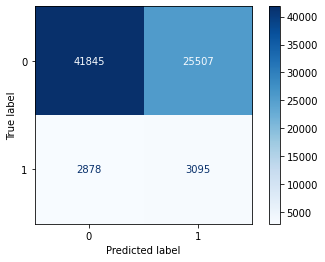

In [0]:
cm = confusion_matrix(y_validation, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot(cmap='Blues')
plt.grid(False)

In [0]:
print('Precisão:', precision_score(y_validation, y_pred))
print('Sensibilidade:', recall_score(y_validation, y_pred))

Precisão: 0.10820921613873155
Sensibilidade: 0.518165076176126


In [0]:
print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.62      0.75     67352
         1.0       0.11      0.52      0.18      5973

    accuracy                           0.61     73325
   macro avg       0.52      0.57      0.46     73325
weighted avg       0.87      0.61      0.70     73325



In [0]:
data = {'SK_ID_CURR': df_pd['SK_ID_CURR'], 'Predict': y_pred, 'Proba': y_proba} 

pd.DataFrame.from_dict(data)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<command-738534953048825> in <module>
      1 data = {'SK_ID_CURR': df_pd['SK_ID_CURR'], 'Predict': y_pred, 'Proba': y_proba}
      2 
----> 3 pd.DataFrame.from_dict(data)
      4 
      5 data

/databricks/python/lib/python3.8/site-packages/pandas/core/frame.py in from_dict(cls, data, orient, dtype, columns)
   1371             raise ValueError("only recognize index or columns for orient")
   1372 
-> 1373         return cls(data, index=index, columns=columns, dtype=dtype)
   1374 
   1375     def to_numpy(

/databricks/python/lib/python3.8/site-packages/pandas/core/frame.py in __init__(self, data, index, columns, dtype, copy)
    527 
    528         elif isinstance(data, dict):
--> 529             mgr = init_dict(data, index, columns, dtype=dtype)
    530         elif isinstance(data, ma.MaskedArray):
    531             import numpy

In [0]:
df_pd['SK_ID_CURR']

Out[175]: 0         398620.0
1         285513.0
2         413814.0
3         406154.0
4         403995.0
            ...   
246003    242114.0
246004    452374.0
246005    276545.0
246006    236776.0
246007    454197.0
Name: SK_ID_CURR, Length: 244414, dtype: float64